In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
np.random.seed(5)

In [27]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving pima-indians-diabetes.csv to pima-indians-diabetes (1).csv
User uploaded file "pima-indians-diabetes.csv" with length 24045 bytes


In [28]:
!ls

'pima-indians-diabetes (1).csv'   pima-indians-diabetes.csv   sample_data


In [0]:
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=",")

In [0]:
x_train = dataset[:700, 0:8]
y_train = dataset[:700,8]
x_test = dataset[700:,0:8]
y_test = dataset[700:,8]

In [31]:
y_test

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [0]:
model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)  ##batch_size 업데이트 주기

Epoch 1/1000
700/700 [==============================] - 0s 345us/step - loss: 4.3962 - acc: 0.6557
Epoch 2/1000
700/700 [==============================] - 0s 20us/step - loss: 3.6813 - acc: 0.6457
Epoch 3/1000
700/700 [==============================] - 0s 23us/step - loss: 3.4812 - acc: 0.6129
Epoch 4/1000
700/700 [==============================] - 0s 21us/step - loss: 3.1297 - acc: 0.6329
Epoch 5/1000
700/700 [==============================] - 0s 19us/step - loss: 2.6731 - acc: 0.6629
Epoch 6/1000
700/700 [==============================] - 0s 26us/step - loss: 2.1596 - acc: 0.6600
Epoch 7/1000
700/700 [==============================] - 0s 22us/step - loss: 1.7139 - acc: 0.6243
Epoch 8/1000
700/700 [==============================] - 0s 24us/step - loss: 1.4445 - acc: 0.5900
Epoch 9/1000
700/700 [==============================] - 0s 23us/step - loss: 1.2254 - acc: 0.6229
Epoch 10/1000
700/700 [==============================] - 0s 22us/step - loss: 1.1239 - acc: 0.6429
Epoch 11/1000
700/

In [35]:
scores = model.evaluate(x_test, y_test)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 799us/step
acc: 75.00%


In [36]:
scores

[0.5656191093080184, 0.75]

[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epoch'), Text(0.5, 1.0, 'model loss')]

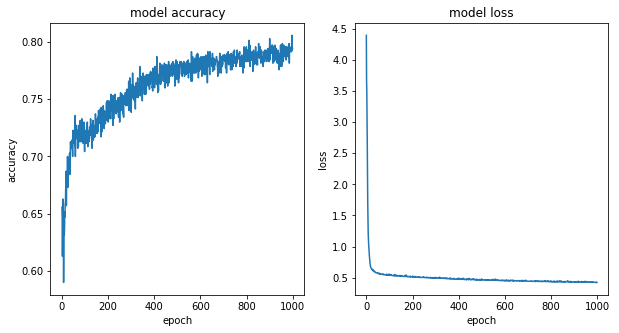

In [37]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5))

ax0.plot(hist.history['acc'])
ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')

ax1.plot(hist.history['loss'])
ax1.set(title='model loss', xlabel='epoch', ylabel='loss')

In [40]:
patient = np.array([[0,137,90,35,168,43.1,2.228,33]])

prediction = model.predict(patient)

print(prediction)

[[0.44306505]]
